# Interactive Visualization with Plotly

For this lab, you'll need to install Plotly. Make sure to follow *both* the [plotly](https://plotly.com/python/getting-started/#installation) steps and the [jupyter support](https://plotly.com/python/getting-started/#jupyterlab-support) steps.

[Plotly](https://plotly.com/python/) is an interactive visualization package which is as part of the [Plotly and Dash](https://plot.ly) enterprise. Here we'll showcase just a few graphs to get you acquainted with their [Plotly Express](https://plotly.com/python/plotly-express/) module. We'll use [data from the titanic disaster](https://www.kaggle.com/competitions/titanic/data).

In [1]:
 pip install plotly==5.19.0

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install "jupyterlab>=3" "ipywidgets>=7.6"

   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.4 MB 3.6 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.4 MB 5.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.4 MB 7.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.4 MB 10.2 MB/s eta 0:00:01
   -------- ------------------------------- 2.5/11.4 MB 11.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.4 MB 10.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.7/11.4 MB 11.6 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.4 MB 13.1 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.4 MB 12.7 MB/s eta 0:00:01
   ------------------- -------------------- 5.6/11.4 MB 12.8 MB/s eta 0:00:01
   --------------------- ------------------ 6.2/11.4 MB 12.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.4 MB 12.4 MB/s eta 0:00:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [7]:
pip install jupyter-dash

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import plotly.express as px
import pandas as pd

In [68]:
df = pd.read_csv("C:\\Users\\91630\\OneDrive\\Desktop\\Informatics assignments\\project\\lab-7\\titanic.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Scatter Plots

In [24]:
fig = px.scatter(data_frame=df,
                 x='Age',
                 y='Fare',
                 hover_data=['Name', 'Sex'],
                 template='plotly_white',
                 color_discrete_sequence=['#3182bd'],
                 log_y=True)
fig.show()

## Bar Charts

We can create some [interesting bar chart variations](https://plot.ly/python/bar-charts/):

In [25]:
fig = px.bar(df, 
             x='Age', 
             y='Sex',
             barmode='overlay',
             hover_data=['Name'],
             template='plotly_white',
             color_discrete_sequence=px.colors.qualitative.D3
            )
fig.show()

## Histograms

In [26]:
df['Survived'].dtype

dtype('int64')

In [27]:
fig = px.histogram(df, 
                   x='Age', 
                   color='Survived',
                   template='plotly_white',
                   color_discrete_sequence=px.colors.qualitative.D3
                  )

fig.update_layout(
    bargap=0.1, # gap between bars of adjacent location coordinates
)

fig.show()

## Bubble Plot

For this plot, we'll transform the data a bit to investigate the survival rates across different age decades.

In [28]:
# calculate decade
df['Age_rounded'] = df['Age'].round(-1)
df[['Age', 'Age_rounded']].head()

,Age,Age_rounded
0,22.0,20.0
1,38.0,40.0
2,26.0,30.0
3,35.0,40.0
4,35.0,40.0


In [29]:
df_plot = df.groupby(['Pclass', 'Age_rounded'])['Survived'] \
            .agg([('Survived', 'sum'), 
                  ('Passengers', 'count')]).reset_index()

df_plot["Pclass"] = df_plot["Pclass"].astype(str)

fig = px.scatter(data_frame=df_plot,
                 x='Age_rounded',
                 y='Survived',
                 size='Passengers',
                 color='Pclass',
                 color_discrete_sequence=px.colors.qualitative.D3,
                 template='plotly_white')
fig.show()

## Limitations ...

What if we want to be able to "animate" the age decade of the passengers? [Be careful](https://plotly.com/python/animations/#:~:text=Animations%20are%20designed%20to%20work%20well%20when%20each%20row%20of%20input%20is%20present%20across%20all%20animation%20frames%2C%20and%20when%20categorical%20values%20mapped%20to%20symbol%2C%20color%20and%20facet%20are%20constant%20across%20frames.%20Animations%20may%20be%20misleading%20or%20inconsistent%20if%20these%20constraints%20are%20not%20met.).

In [67]:
fig = px.histogram(df.sort_values('Age_rounded'), 
                   x='Pclass',
                   color='Survived',
                   template='plotly_white',
                   animation_frame="Age_rounded",  # this is the value to "animate"
                   # animation_group="PassengerId",  # uncomment this ...
                   color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(
    xaxis_tickmode = 'array',
    xaxis_tickvals = [1, 2, 3],
    xaxis_ticktext = ['First', 'Second', 'Third'],
    bargap=0.1, # gap between bars of adjacent location coordinates
)

fig["layout"].pop("updatemenus") # drop animation buttons
fig.show()

KeyError: 'Age_rounded'

**(In class, if there's time) Can we improve on this?**

In [31]:
# fig = px.histogram(df.sort_values('Age_rounded'), 
#                    x='Pclass',
#                    facet_row='Survived',
#                    color='Age_rounded',
#                    template='plotly_white',
#                    color_discrete_sequence=px.colors.sequential.Blues)

# fig.update_layout(
#     xaxis_tickmode = 'array',
#     xaxis_tickvals = [1, 2, 3],
#     xaxis_ticktext = ['First', 'Second', 'Third'],
#     bargap=0.1, # gap between bars of adjacent location coordinates
# )

# fig["layout"].pop("updatemenus") # drop animation buttons
# fig.show()

# EXERCISES

## Exercise 1

Take a look at the `Cabin` column of the data, and investigate how it relates to at least one other column. Consider the context of the Titanic ship wreck. Try to formulate a question around this column, and visualize it using Plotly. **Build at least 2 different plots** of the same data.

Feel free to use the [gallery](https://plotly.com/python/) as a resource.

<li>The question I figured out is <b>"Did passengers traveling alone (without any family members) have a higher or lower chance of survival compared to passengers traveling with family members?"</b>. So I am going to work on that for my Exercise 1

In [69]:
import pandas as pd
import plotly.express as px

df['Family_Size'] = df['SibSp'] + df['Parch']

df['Travel_Companion'] = df['Family_Size'].apply(lambda x: 'Alone' if x == 0 else 'With Family')

survival_rates = df.groupby('Travel_Companion')['Survived'].mean().reset_index()

fig1 = px.bar(survival_rates, x='Travel_Companion', y='Survived',
              labels={'Travel_Companion': 'Travel Companion', 'Survived': 'Survival Rate'},
              title='Survival Rate by Travel Companion Status')



fig1.show()



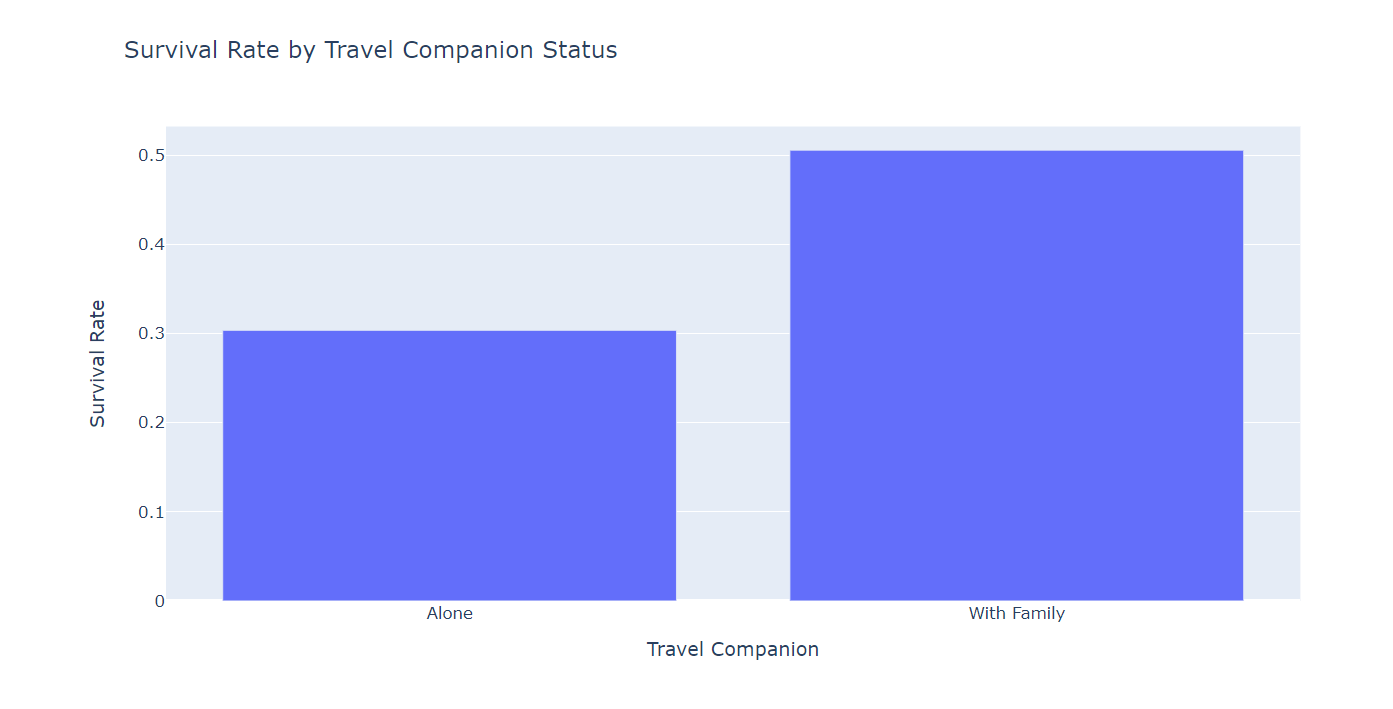

In [70]:

# Plot: Pie chart showing the proportion of survivors among passengers traveling alone and with family
fig = px.pie(survival_rates, values='Survived', names='Travel_Companion', 
             title='Proportion of Survivors by Travel Companion Status',
             labels={'Survived': 'Survival Rate', 'Travel_Companion': 'Travel Companion'},
             hole=0.3)

fig.show()

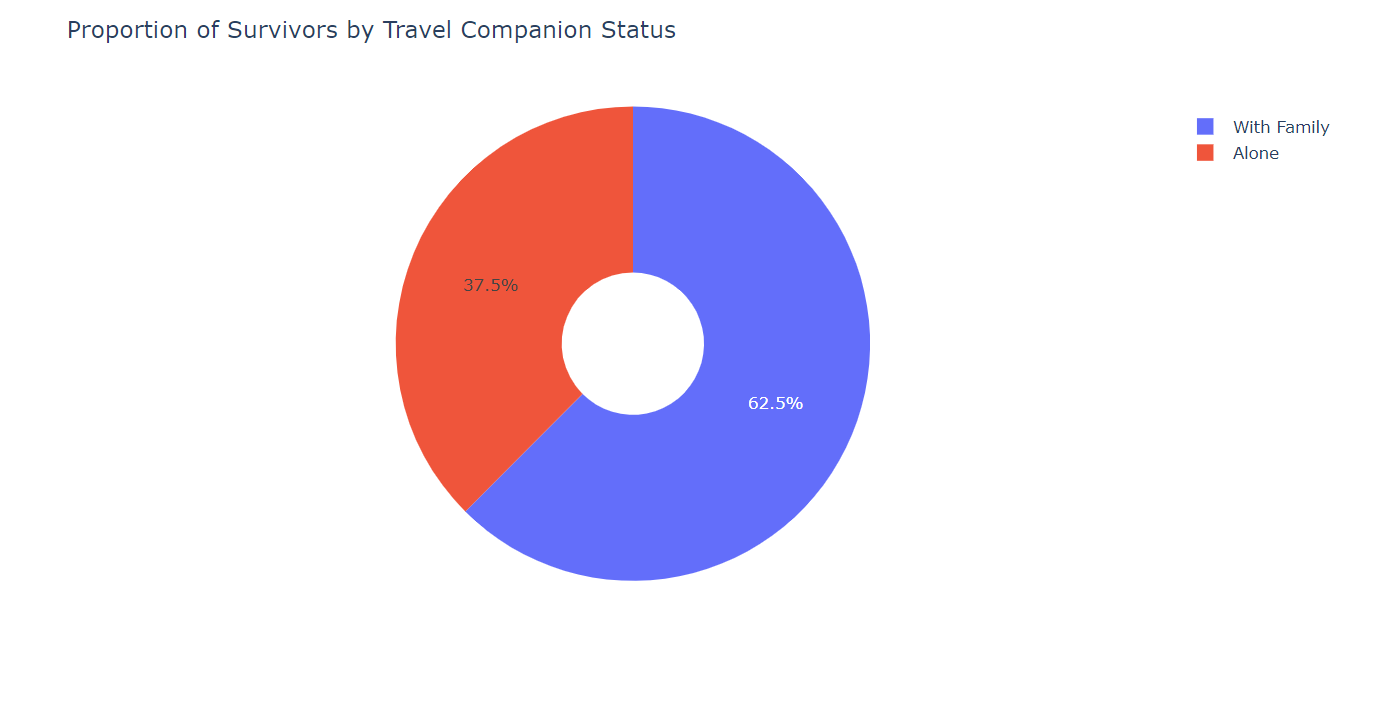

## Exercise 2

Consider the Bubble Plot, above. Try to figure out what it might be trying to communicate.

1. Point out at least three issues with this visualization.
2. Build at least two visualizations in Plotly that communicate a similar message, but which do it far better.

### Problems in the above Bubble plot:
1. The bubbles representing "Survived" and "Not Survived" passengers are all jumbled together, making it hard to tell who's who.
2. There aren't any labels telling us what the numbers mean on the graph.
3. Some bubbles look  bigger than other ones, even if they're supposed to represent the same thing. This is creating confusion.

Now here I am using <b>Bar Chart</b> and <b> Scatter plot</b> to repersent the data;
1. The bar chart and scatter plot show things more clearly than the bubble plot because they don't squish everything together.
2. They both tell us what is what with clear labels, unlike the bubble plot that makes it difficult for us to understand.
3. And unlike those weird-sized bubbles, the bar chart and scatter plot give each group a fair shape without any confusion.

In [71]:
import plotly.express as px

# Bar Chart
fig_bar = px.bar(df_plot, x='Age_rounded', y='Survived', color='Pclass',
                 labels={'Survived': 'Survivors', 'Age_rounded': 'Age Rounded'},
                 template='plotly_white')
fig_bar.update_layout(title='Survival Rate by Age Rounded and Passenger Class (Bar Chart)',
                      xaxis_title='Age Rounded',
                      yaxis_title='Survival Rate')
fig_bar.show()


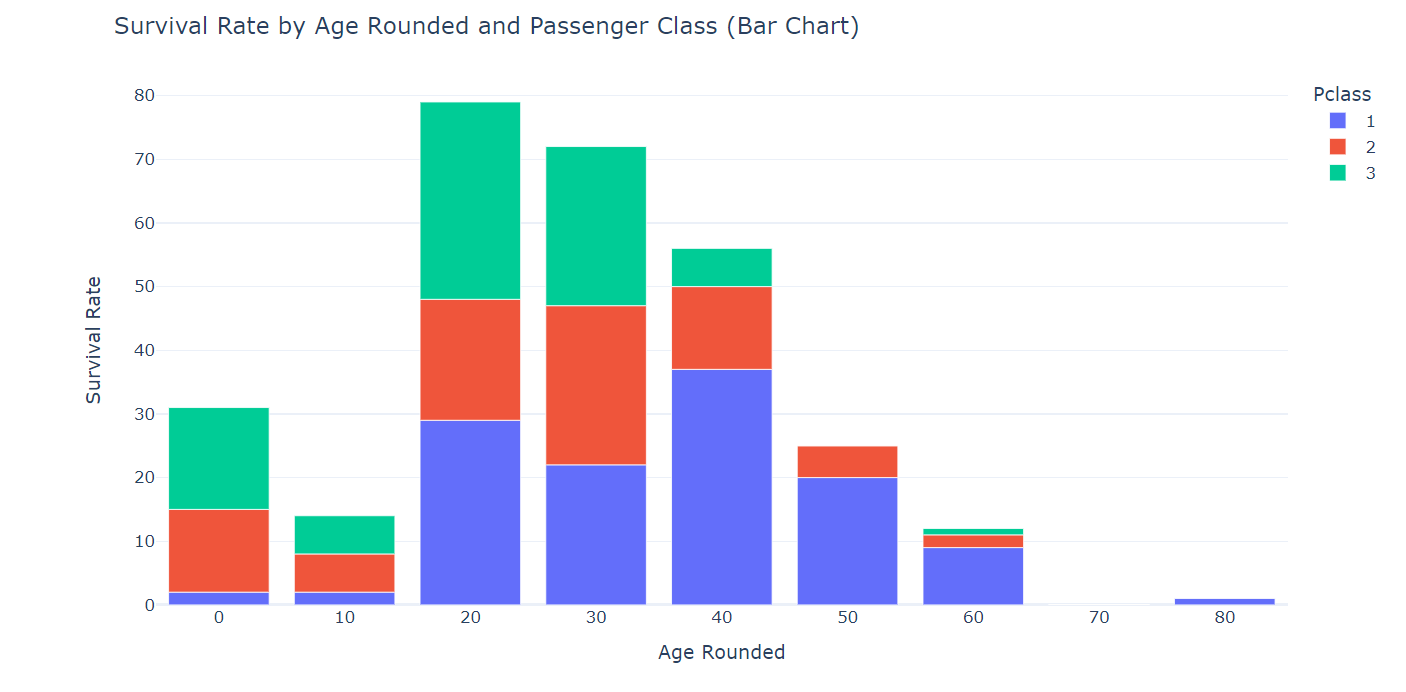

In [72]:
import plotly.express as px

# Grouped Scatter Plot
fig_scatter_grouped = px.scatter(df_plot, x='Age_rounded', y='Survived', color='Pclass', symbol='Pclass',
                                 labels={'Survived': 'Survivors', 'Age_rounded': 'Age Rounded'},
                                 template='plotly_white')
fig_scatter_grouped.update_layout(title='Survival Rate by Age Rounded and Passenger Class (Grouped Scatter Plot)',
                                  xaxis_title='Age Rounded',
                                  yaxis_title='Survival Rate')
fig_scatter_grouped.show()


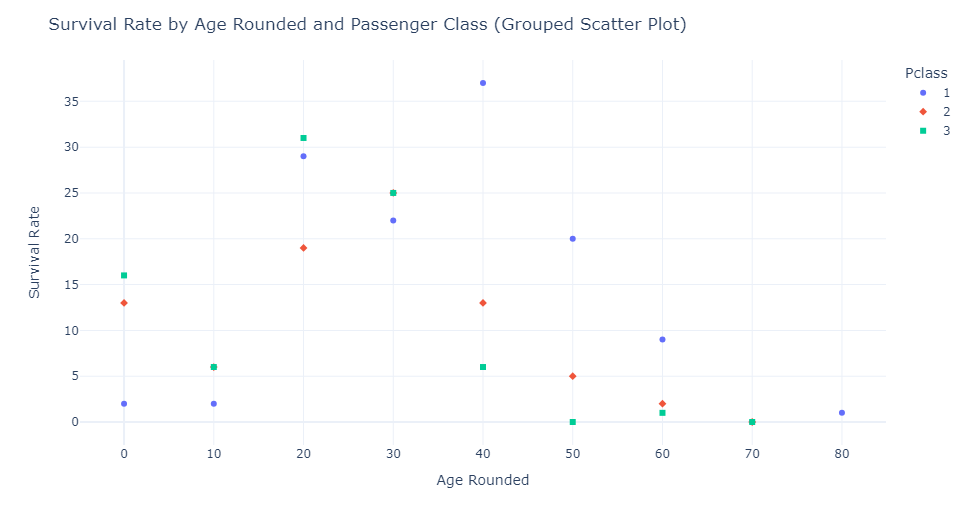